**Maya Kalenak**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [2]:
iris_data = pd.read_csv("data/iris.csv")
df = pd.DataFrame(iris_data)
df = df[['sepalLength','sepalWidth','petalLength','petalWidth']]

print(df.head())

   sepalLength  sepalWidth  petalLength  petalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2


### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

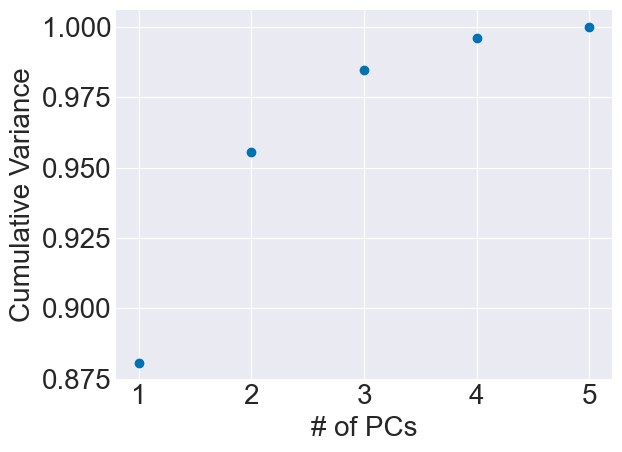

In [3]:
analysis = pca.PCA(iris_data)
analysis.fit(list(iris_data.columns),True)
analysis.elbow_plot()
plt.show()

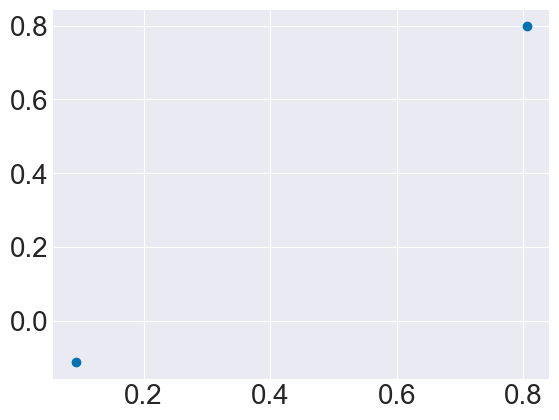

In [4]:
projected_matrix = analysis.pca_project([0,1])
plt.scatter(projected_matrix[0],projected_matrix[1]);

### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

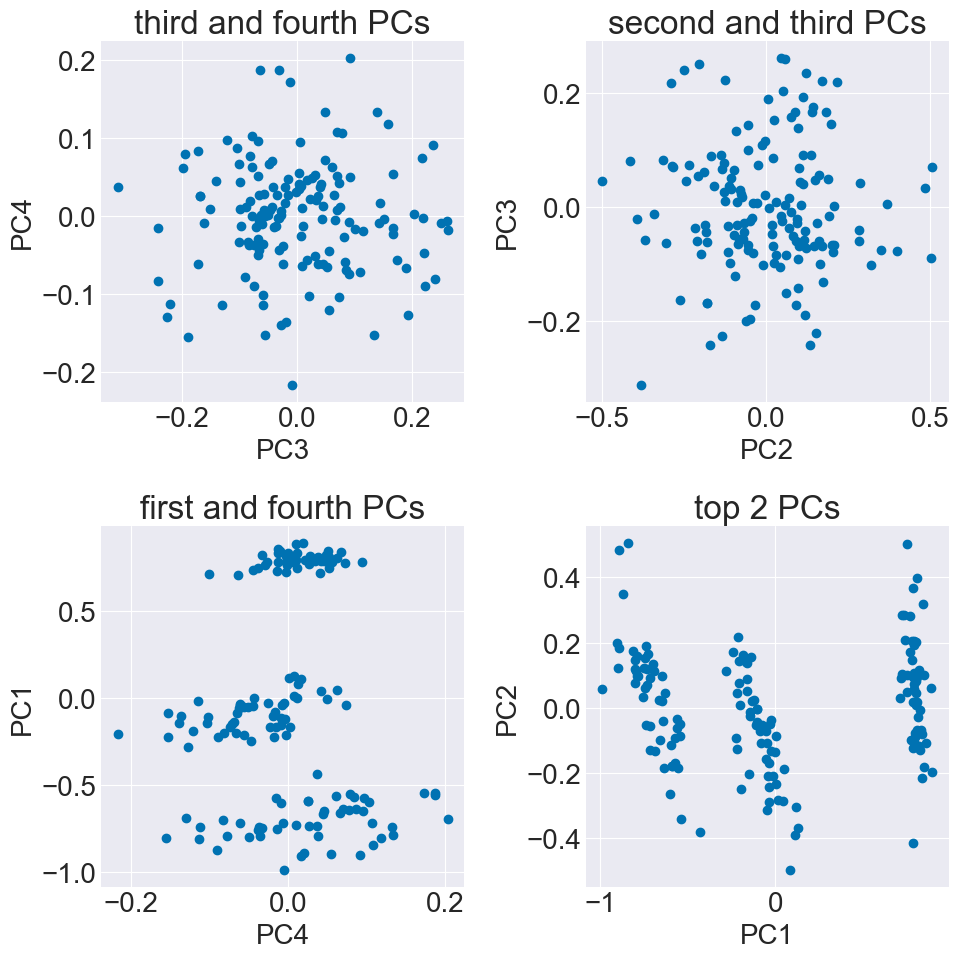

In [5]:
fig,ax = plt.subplots(2,2,figsize = (10,10))

plt.subplot(2,2,1)
Ac_hat1 = analysis.pca_project([2,3]) 
plt.scatter(Ac_hat1[:,0],Ac_hat1[:,1])
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.title("third and fourth PCs")

plt.subplot(2,2,2)
Ac_hat2 = analysis.pca_project([1,2]) 
plt.scatter(Ac_hat2[:,0],Ac_hat2[:,1])
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.title("second and third PCs")

plt.subplot(2,2,3)
Ac_hat3 = analysis.pca_project([3,0])
plt.scatter(Ac_hat3[:,0],Ac_hat3[:,1])
plt.xlabel("PC4")
plt.ylabel("PC1")
plt.title("first and fourth PCs")

plt.subplot(2,2,4)
Ac_hat4 = analysis.pca_project([0,1])
plt.scatter(Ac_hat4[:,0],Ac_hat4[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("top 2 PCs")

plt.tight_layout()

### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:** PC1 varies with PC2 and PC4, but PC3 doesn't vary together well with PC2 and PC4. 

### 3e. Reconstruct data based on PCs

In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space. Then in the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.

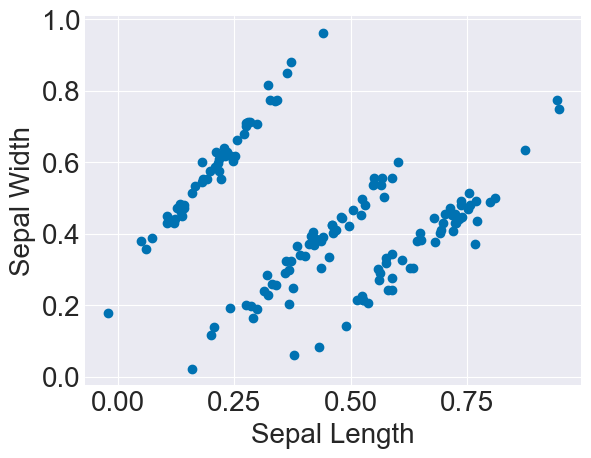

In [7]:
reconstructed_data_matrix = analysis.pca_then_project_back(2)
plt.scatter(reconstructed_data_matrix[:,0], reconstructed_data_matrix[:,1])
plt.ylabel("Sepal Width")
plt.xlabel("Sepal Length");

In the cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

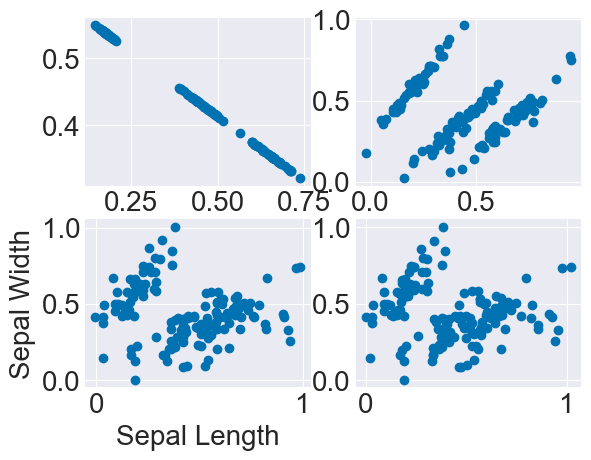

In [8]:
reconstructed_data = analysis.pca_then_project_back(1)
# print(reconstructed_data)
plt.subplots(2,2)
plt.subplot(2,2,1)
plt.scatter(reconstructed_data[:,0], reconstructed_data[:,1])
reconstructed_data = analysis.pca_then_project_back(2)
plt.subplot(2,2,2)
plt.scatter(reconstructed_data[:,0], reconstructed_data[:,1])
reconstructed_data = analysis.pca_then_project_back(3)
plt.subplot(2,2,3)
plt.scatter(reconstructed_data[:,0], reconstructed_data[:,1])
plt.ylabel("Sepal Width")
plt.xlabel("Sepal Length")
reconstructed_data = analysis.pca_then_project_back(4)
plt.subplot(2,2,4)
plt.scatter(reconstructed_data[:,0], reconstructed_data[:,1]);

### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:** The first re-projection reconstructs the PCA from first principle component, so it doesn't preserve the data well. The second uses the top two principle components to reconstruct the data and preserves almost all of the data, showing where the data varies most importantly. The third and fourth subplots preserve the most of the data when reconstructing with three and four principle components but are not as easily interprretable as the second, possibly because the third and fourth principle component don't contribute as much to the PCA as the first and second.  

### 3g. Implement loading plot

To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure specifically, with respect to the original data variables?

**Question 11:** What specific correlations among original data variables do the loadings help us identity?

**Answer 10:** This tells us that all variables contribute positively to the second principle component and all but the first contribute negatively to the first principle component. Variable 2 and 3 contribute similarly to both the first and second principle components. They have almost no contribution to the second principle component and relatively the same contribution to the first. The correlation between these loadings and how they contribute to PC1 and PC2 show how these principle components contribute positively and negatively to PCA. In relation to the variables, this means that sepal width has a negative contribution to sepal length.  

**Answer 11:** Load plots can help see correlations, if any, between any two given principle components, and the contributions that each variable gives to the two principle components, along with the importance of the contribution. Since all of the loadings have similar magnitutes, their importances are similar, except for variable 2 and 3's contribution to PC2 which is close to 0. Since the variables 0,2,3, and 4 contribute positively to PC1 and variable 1 contributes positively to PC1, and all variables contribute positively to PC2, this shows that sepal length and sepal width have similar contributions to PCA in magnitude, but sepal width has a more negation relation to sepal length. 

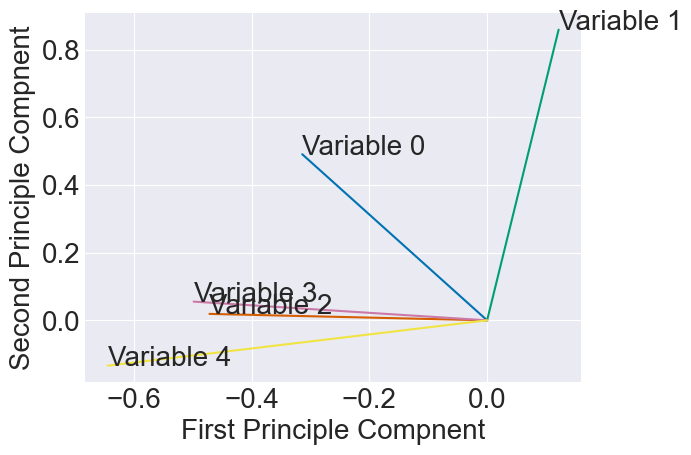

In [9]:
analysis.loading_plot()